# Permeable contorno

In [1]:
from matplotlib import pyplot as plt

In [2]:
from scipy.spatial.distance import euclidean

In [32]:
import numpy as np
from math import sqrt, isclose

In [69]:
disc1=np.array([3.0, 9.0, 4.0])
r1=0.5

disc2=np.array([5.0, 2.0, 1.0])
r2=0.9

disc3=np.array([5.0, 6.0, 1.0])
r3=0.7

In [70]:
rp=1.2

In [71]:
v12=disc2-disc1
d12=sqrt(v12[0]**2+v12[1]**2+v12[2]**2)
u12=v12/d12

v13=disc3-disc1
d13=sqrt(v13[0]**2+v13[1]**2+v13[2]**2)
u13=v13/d13

v23=disc3-disc2
buen_d23=sqrt(v23[0]**2+v23[1]**2+v23[2]**2)

cosa= u12[0]*u13[0]+u12[1]*u13[1]+u12[2]*u13[2]

disc1=np.array([0,0])
disc2=d12*np.array([1,0])
disc3=d13*np.array([cosa,sqrt(1-cosa**2)])

v23=disc3-disc2
d23=sqrt(v23[0]**2+v23[1]**2)

isclose(buen_d23,d23)

True

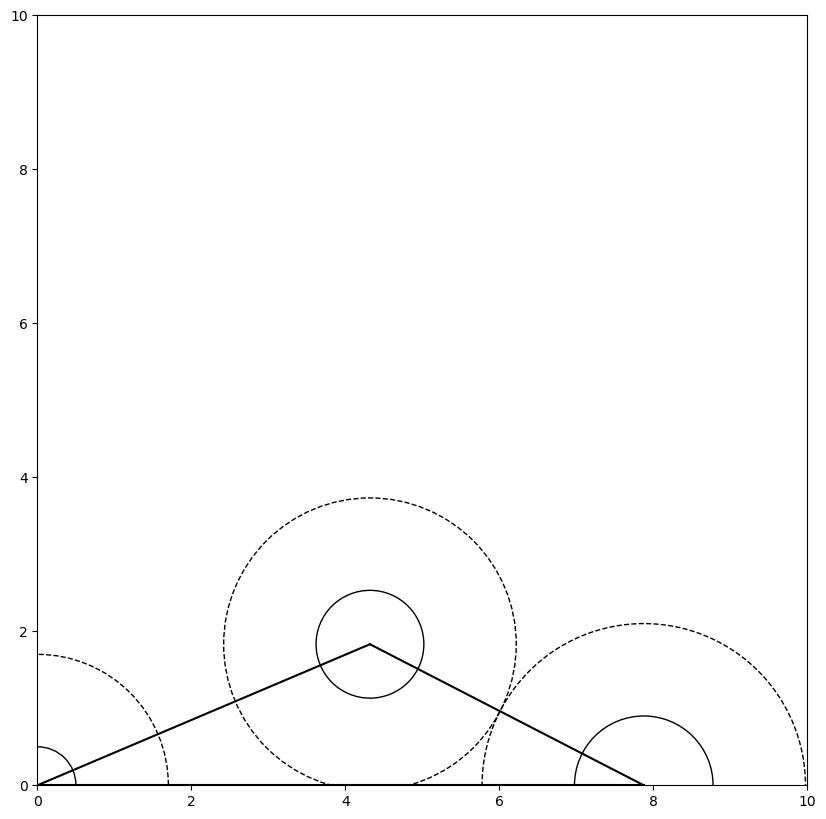

In [72]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()

ax.add_patch(plt.Circle(disc1, radius=r1, color='k', fill=False))
ax.add_patch(plt.Circle(disc2, radius=r2, color='k', fill=False))
ax.add_patch(plt.Circle(disc3, radius=r3, color='k', fill=False))
plt.plot([disc1[0], disc2[0]], [disc1[1], disc2[1]], color='k')
plt.plot([disc1[0], disc3[0]], [disc1[1], disc3[1]], color='k')
plt.plot([disc2[0], disc3[0]], [disc2[1], disc3[1]], color='k')

ax.add_patch(plt.Circle(disc1, radius=r1+rp, linestyle='--', color='k', fill=False))
ax.add_patch(plt.Circle(disc2, radius=r2+rp, linestyle='--', color='k', fill=False))
ax.add_patch(plt.Circle(disc3, radius=r3+rp, linestyle='--', color='k', fill=False))

#ax.add_patch(plt.Circle(discp, radius=rp, color='r', fill=False))

#x,y = bar2xy([b1,b2,b3], disc1, disc2, disc3)
#plt.plot(2.73, 1.19, marker="o", markersize=10, color="red")

plt.axis('scaled')
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

In [73]:
def is_permeable_mc(rp, disc1, r1, disc2, r2, disc3, r3):

    rnd = np.random.uniform(0, 1, [500000,2])
    sample=[]
    for ii,jj in rnd:
        if ii+jj<=1.0:
            sample.append([ii,jj,1.0-ii-jj])

    pasa=False
    
    for u,v,w in sample:
        
        x = u*disc1[0]+v*disc2[0]+w*disc3[0]
        y = u*disc1[1]+v*disc2[1]+w*disc3[1]

        if (r1+rp)<euclidean([x,y],disc1):
            if (r2+rp)<euclidean([x,y],disc2):
                if (r3+rp)<euclidean([x,y],disc3):
                    pasa=True
                    break

    return pasa

In [74]:
def is_in_triangle(pp, disc1, disc2, disc3):

    A = abs(disc1[0]*(disc2[1]-disc3[1]) + disc2[0]*(disc3[1]-disc1[1]) + disc3[0]*(disc1[1]-disc2[1]))
    A1 = abs(pp[0]*(disc2[1]-disc3[1]) + disc2[0]*(disc3[1]-pp[1]) + disc3[0]*(pp[1]-disc2[1]))
    A2 = abs(disc1[0]*(pp[1]-disc3[1]) + pp[0]*(disc3[1]-disc1[1]) + disc3[0]*(disc1[1]-pp[1]))
    A3 = abs(disc1[0]*(disc2[1]-pp[1]) + disc2[0]*(pp[1]-disc1[1]) + pp[0]*(disc1[1]-disc2[1]))

    return A==(A1+A2+A3)

In [75]:
def is_permeable(rp, disc1, r1, disc2, r2, disc3, r3):


    v12 = disc2-disc1
    d12 = sqrt(v12[0]**2+v12[1]**2)
    u12 = v12/d12
    
    if d12>r1+r2+2*rp:
        
        vs = disc3-(disc1+(r1+rp)*u12)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r3+rp:
            return True
            
        vs = disc3-(disc2-(r2+rp)*u12)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r3+rp:
            return True

    v13 = disc3-disc1
    d13 = sqrt(v13[0]**2+v13[1]**2)
    u13 = v13/d13
    
    if d13>r1+r3+2*rp:
            
        vs = disc2-(disc1+(r1+rp)*u13)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r2+rp:
            return True
            
        vs = disc2-(disc3-(r3+rp)*u13)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r2+rp:
            return True

    v23 = disc3-disc2
    d23 = sqrt(v23[0]**2+v23[1]**2)
    u23 = v23/d23
    
    if d23>r2+r3+2*rp:
            
        vs = disc1-(disc2+(r2+rp)*u23)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r1+rp:
            return True
            
        vs = disc1-(disc3-(r3+rp)*u23)
        ds = sqrt(vs[0]**2+vs[1]**2)
        if ds>r1+rp:
            return True

    ###

    barcenter = (disc1+disc2+disc3)/3.0
    
    uperp12=np.array([-u12[1],u12[0]])

    middle=disc1+(((d12-r1-r2)/2.0)+r1)*u12
    good_sense=barcenter-middle
    if good_sense[0]*uperp12[0]+good_sense[1]*uperp12[1]<0:
        uperp12=-uperp12
    
    aa = 4*d12**2*(r1+rp)**2-(d12**2-(r2+rp)**2+(r1+rp)**2)**2
    if aa<0.0:
        a=0
    else:
        a = 0.5*(1.0/d12)*sqrt(aa)
        
    pp = middle+a*uperp12

    if is_in_triangle(pp, disc1, disc2, disc3):
        vp = disc3-pp
        dp = sqrt(vp[0]**2+vp[1]**2)
        if dp>r3+rp:
            return True

    ###
    
    uperp13=np.array([-u13[1],u13[0]])

    middle=disc1+(((d13-r1-r3)/2.0)+r1)*u13
    good_sense=barcenter-middle
    if good_sense[0]*uperp13[0]+good_sense[1]*uperp13[1]<0:
        uperp13=-uperp13
    
    aa = 4*d13**2*(r1+rp)**2-(d13**2-(r3+rp)**2+(r1+rp)**2)**2
    if aa<0.0:
        a=0
    else:
        a = 0.5*(1.0/d13)*sqrt(aa)
        
    pp = middle+a*uperp13

    if is_in_triangle(pp, disc1, disc2, disc3):
        vp = disc2-pp
        dp = sqrt(vp[0]**2+vp[1]**2)
        if dp>r2+rp:
            return True

    ###

    uperp23=np.array([-u23[1],u23[0]])

    middle=disc2+(((d23-r2-r3)/2.0)+r2)*u23
    good_sense=barcenter-middle
    if good_sense[0]*uperp23[0]+good_sense[1]*uperp23[1]<0:
        uperp23=-uperp23
    
    aa = 4*d23**2*(r2+rp)**2-(d23**2-(r3+rp)**2+(r2+rp)**2)**2
    if aa<0.0:
        a=0
    else:
        a = 0.5*(1.0/d23)*sqrt(aa)
        
    pp = middle+a*uperp23

    if is_in_triangle(pp, disc1, disc2, disc3):
        vp = disc1-pp
        dp = sqrt(vp[0]**2+vp[1]**2)
        if dp>r1+rp:
            return True

    return False

In [76]:
is_permeable(rp, disc1, r1, disc2, r2, disc3, r3)

True

In [77]:
is_permeable(rp, disc1, r1, disc3, r3, disc2, r2)

True

In [78]:
is_permeable(rp, disc2, r2, disc1, r1, disc3, r3)

True

In [79]:
is_permeable(rp, disc2, r2, disc3, r3, disc1, r1)

True

In [80]:
is_permeable(rp, disc3, r3, disc1, r1, disc2, r2)

True

In [81]:
is_permeable(rp, disc3, r3, disc2, r2, disc1, r1)

True

In [82]:
is_permeable_mc(rp, disc1, r1, disc2, r2, disc3, r3)

True